# Proje 2 - Scikit-learn ile Makine Öğrenmesi

* Aşağıdaki sorularda belirtilen problemlerin çözümlerini (istenilenleri yerine getirerek) ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz.
* Proje teslimi 09.07.2021 Cuma saat 15:00’e kadar yapılırsa projeniz 120 puan üzerinden değerlendirilecek ve final sınavı notu yerine geçecektir, 12.07.2021 Pazartesi saat 15:00’e kadar yapılırsa projeniz 100 puan üzerinden değerlendirilecek ve bütünleme sınavı notu yerine geçecektir.
* Projeler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu projelerin notunda aynı oranda kesinti yapılacaktır veya bu projeler sıfır alacaktır.
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız. Ayrıca olası güncelleme ve/veya açıklamalar için forumu takip ediniz.

**Açıklamalar:**
* Projede ekte verilen bir şirketin çalışanlarına ilişkin verileri içeren "insan_kaynaklari.csv" adlı dosya kullanılacaktır.
* Sorularda verilen her problem için aşağıdaki işlemler adım adım gerçekleştirilecektir:
  1. Her model için kullanılması gerektiğini (etkili olduğunu) düşündüğünüz öznitelikleri belirleyiniz. 
  2. Kategorik olan sütunları one-hot encoding yöntemi ile ikili vektör temsiline dönüştürünüz. Örneğin:
  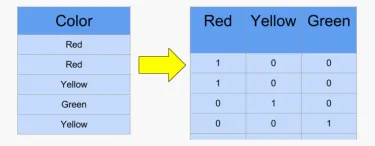
  3. Kategorik olmayan sütunlarda gerekiyorsa normalizasyon işlemi uygulayınız. + 
  4. Problem bir **regresyon problemi** ise k-fold cross-validation ile probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz ve hangi özniteliklerin çıktı değişkenini daha fazla etkilediğini yorumlayınız. Problem bir **sınıflandırma problemi** ise modelde kullanılacak hyper-parametre aramasını k-fold cross-validation ile yaparak (GridSearchCV modülünü ***uygun metrikler*** ile -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanabilirsiniz), test verisi üzerinde probleme uygun metrik**ler** -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanarak tahmin modelinizin performansını değerlendiriniz. Problem bir **kümeleme problemi** ise optimum küme sayısını belirleyiniz, belirlediğiniz küme sayısına göre verileri kümeleyiniz ve bulduğunuz kümeleri kısaca analiz edip yorumlayınız.
  5. Farklı öznitelikler ve/veya makine öğrenmesi yöntemleri kullanarak daha iyi performans gösteren 2-3 model daha geliştirmeye çalışınız (sarf ettiğiniz eforun görülebilmesi amacıyla bu modellere ilişkin kodları silmeyiniz). 
  6. Veri setinde olmayan yeni bir veri için geliştirdiğiniz en iyi modelin üreteceği çıktıyı (tahmin/küme) veriniz.
* İşlemleri gerçekleştirirken gerekli gördüğünüz yerleri (tercih ettiğiniz birşeyin nedeni v.b. gibi) açıklayınız.

### Soru 1: Bir çalışanın memnuniyet düzeyinin tahminlenmesi

In [2]:
#PREPROCESSING

import pandas as pd
import numpy as np


file = pd.read_csv('insan_kaynaklari.csv')
df = pd.DataFrame(file)
df.head()

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi,calistigi_bolum,maas_derecesi
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [112]:
#MODEL 1

In [113]:
df=df[["memnuniyet_duzeyi","son_5_yilda_terfi_aldi","is_kazasina_ugradi","aylik_ort_calisma_saati",'calistigi_bolum','maas_derecesi',"sirketten_ayrildi"]]
#ONE HOT ENCODING
one_hot = pd.get_dummies(df['calistigi_bolum'])
df = df.drop('calistigi_bolum', axis=1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['maas_derecesi'])
df = df.drop('maas_derecesi', axis=1)
df = df.join(one_hot)
df.head()

,memnuniyet_duzeyi,son_5_yilda_terfi_aldi,is_kazasina_ugradi,aylik_ort_calisma_saati,sirketten_ayrildi,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0,0,157,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0,0,262,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0,0,272,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0,0,223,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0,0,159,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [114]:
#NORMALIZATON

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["memnuniyet_duzeyi", 'aylik_ort_calisma_saati']] = scaler.fit_transform(df[["memnuniyet_duzeyi", 'aylik_ort_calisma_saati']])
df.head()

,memnuniyet_duzeyi,son_5_yilda_terfi_aldi,is_kazasina_ugradi,aylik_ort_calisma_saati,sirketten_ayrildi,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.318681,0,0,0.285047,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.780220,0,0,0.775701,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.021978,0,0,0.822430,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.692308,0,0,0.593458,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.307692,0,0,0.294393,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [115]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values.reshape(-1,1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [117]:
#TRAIN
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(normalize=True)
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = lr_model.predict(X_test)
mse_score = mean_squared_error(y_test, y_pred)
mae_score = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
              
print("MSE score:", mse_score)
print("MAE score:", mae_score)
print("R2 score:", r2)

MSE score: 0.06410924078992745
MAE score: 0.200682620764652
R2 score: 0.1311726120526714


In [119]:
#K_FOLD
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lr_model, X_train, y_train, scoring='r2', cv=folds)
scores   


#model performs tad bit better with folded data set

array([0.14871498, 0.15485394, 0.16348729, 0.16940114, 0.13042524])

In [120]:
#MODEL 2 - changing independent variables

In [418]:
file = pd.read_csv('insan_kaynaklari.csv')
df = pd.DataFrame(file)
df.head()

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi,calistigi_bolum,maas_derecesi
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [419]:
#MODEL 1

In [420]:
df=df[["memnuniyet_duzeyi","aldigi_degerlendirme_puani","son_5_yilda_terfi_aldi","is_kazasina_ugradi","aylik_ort_calisma_saati",'calistigi_bolum','maas_derecesi',"sirketten_ayrildi"]]

#ONE HOT ENCODING
one_hot = pd.get_dummies(df['calistigi_bolum'])
df = df.drop('calistigi_bolum', axis=1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['maas_derecesi'])
df = df.drop('maas_derecesi', axis=1)
df = df.join(one_hot)
df.head()

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,son_5_yilda_terfi_aldi,is_kazasina_ugradi,aylik_ort_calisma_saati,sirketten_ayrildi,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,0,0,157,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,0,0,262,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,0,0,272,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,0,0,223,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,0,0,159,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [422]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["aldigi_degerlendirme_puani","memnuniyet_duzeyi", 'aylik_ort_calisma_saati']] = scaler.fit_transform(df[["aldigi_degerlendirme_puani","memnuniyet_duzeyi", 'aylik_ort_calisma_saati']])
df.head()

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,son_5_yilda_terfi_aldi,is_kazasina_ugradi,aylik_ort_calisma_saati,sirketten_ayrildi,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.318681,0.265625,0,0,0.285047,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.780220,0.781250,0,0,0.775701,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.021978,0.812500,0,0,0.822430,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.692308,0.796875,0,0,0.593458,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.307692,0.250000,0,0,0.294393,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [423]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values.reshape(-1,1)

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [425]:
lr_model = LinearRegression(normalize=True)
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [426]:
score = lr_model.score(X_train,y_train) #training accuracy
score

0.16950993460508523

In [427]:
score = lr_model.score(X_test,y_test) #training accuracy
score

0.1430474855678655

In [429]:
y_pred = lr_model.predict(X_test)
mse_score = mean_squared_error(y_test, y_pred)
mae_score = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
              
print("MSE score:", mse_score)
print("MAE score:", mae_score)
print("R2 score:", r2)

MSE score: 0.0632330148144387
MAE score: 0.1990806589650584
R2 score: 0.1430474855678655


In [430]:
#"aldigi_degerlendirme_puani" parametresinin eklenmesi başarı arttırımı sağlamıştır.

In [431]:
#K_FOLD

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lr_model, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.16302298, 0.16924816, 0.17534663, 0.17695863, 0.1479791 ])

In [ ]:
#MODEL 3 - decision tree regression

In [432]:
from sklearn.tree import DecisionTreeRegressor

In [440]:
tree_regressor = DecisionTreeRegressor(random_state = 20,max_depth=28)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=28,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=20, splitter='best')

In [441]:
score = tree_regressor.score(X_train,y_train) #training accuracy
score

0.6735353841752655

In [442]:
score = tree_regressor.score(X_test,y_test) #training accuracy
score

0.022711778291975907

In [443]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 34)
scores = cross_val_score(tree_regressor, X_train, y_train, scoring='r2', cv=folds)
scores

array([ 0.01571732,  0.0267957 , -0.04205966,  0.03088868,  0.04400047])

In [ ]:
#linear regression score = array([0.16302298, 0.16924816, 0.17534663, 0.17695863, 0.1479791 ])
#decision tree score = array([ 0.01571732,  0.0267957 , -0.04205966,  0.03088868,  0.04400047]) 
#r2 metrik sonuçları karşılaştırıldığında linear r  daha başarılıdır.

### Soru 2: Bir çalışanın şirketten ayrılıp ayrılmayacağının tahminlenmesi

In [3]:
#logistic regression

#preprocessing

file = pd.read_csv('insan_kaynaklari.csv')
df = pd.DataFrame(file)
df.head()

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi,calistigi_bolum,maas_derecesi
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df=df[["sirketten_ayrildi","aldigi_degerlendirme_puani","aylik_ort_calisma_saati","son_5_yilda_terfi_aldi",'calistigi_bolum',"maas_derecesi"]]

#ONE HOT ENCODING
one_hot = pd.get_dummies(df['calistigi_bolum'])
df = df.drop('calistigi_bolum', axis=1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['maas_derecesi'])
df = df.drop('maas_derecesi', axis=1)
df = df.join(one_hot)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["aldigi_degerlendirme_puani", 'aylik_ort_calisma_saati']] = scaler.fit_transform(df[["aldigi_degerlendirme_puani", 'aylik_ort_calisma_saati']])
df.head()

,sirketten_ayrildi,aldigi_degerlendirme_puani,aylik_ort_calisma_saati,son_5_yilda_terfi_aldi,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,1,0.265625,0.285047,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,0.781250,0.775701,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0.812500,0.822430,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0.796875,0.593458,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0.250000,0.294393,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [7]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train.ravel())

C:\Users\aycae\anaconda3\envs\py36env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aycae\anaconda3\envs\py36env\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
LogisticRegression().get_params().keys() #parameters for grid search

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [24]:
from sklearn.model_selection import GridSearchCV


# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Grid search cross validation
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train.ravel())

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test.ravel()))

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l1'}
accuracy : 0.7612301025085424
score 0.7646666666666667


C:\Users\aycae\anaconda3\envs\py36env\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
score = logit.score(X_train,y_train) #training accuracy
score

0.7612301025085424

In [473]:
score = logit.score(X_test, y_test) #testing accuracy
score

0.7646666666666667

In [476]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
cv_results = cross_val_score(logit, 
                             X_train, 
                             y_train, 
                             cv=folds, 
                             scoring="accuracy", # classification metric
                             n_jobs=-1) 

In [477]:
cv_results


array([0.76916667, 0.75333333, 0.76083333, 0.75208333, 0.77073781])

In [467]:
cv_results.mean()

0.7612308948172849

In [ ]:
#MODEL 2 without aldigi_degerlendirme_puani

In [489]:
#preprocessing

file = pd.read_csv('insan_kaynaklari.csv')
df = pd.DataFrame(file)
df=df[[ "sirketten_ayrildi","aylik_ort_calisma_saati","son_5_yilda_terfi_aldi",'calistigi_bolum',"maas_derecesi"]]

one_hot = pd.get_dummies(df['maas_derecesi'])
df = df.drop('maas_derecesi', axis=1)
df = df.join(one_hot)
       
one_hot = pd.get_dummies(df['calistigi_bolum'])
df = df.drop('calistigi_bolum', axis=1)
df = df.join(one_hot)
       
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["sirketten_ayrildi", 'aylik_ort_calisma_saati']] = scaler.fit_transform(df[["sirketten_ayrildi", 'aylik_ort_calisma_saati']])
df.head()

,sirketten_ayrildi,aylik_ort_calisma_saati,son_5_yilda_terfi_aldi,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,1.0,0.285047,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1.0,0.775701,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1.0,0.822430,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1.0,0.593458,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1.0,0.294393,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [490]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [491]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [492]:
logit.fit(X_train,y_train.ravel()) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [493]:
score = logit.score(X_train,y_train) #training accuracy
score

0.7612301025085424

In [494]:
score = logit.score(X_test, y_test) #testing accuracy
score

0.7646666666666667

In [495]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
cv_results = cross_val_score(logit, 
                             X_train, # Feature matrix
                             y_train, # Target vector
                             cv=folds, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) 

In [496]:
cv_results

array([0.76916667, 0.75333333, 0.76083333, 0.75208333, 0.77073781])

In [488]:
cv_results.mean()

0.7612308948172849

In [ ]:
"""model 1 independent variables:
    "sirketten_ayrildi","aldigi_degerlendirme_puani","aylik_ort_calisma_saati","son_5_yilda_terfi_aldi",'calistigi_bolum',"maas_derecesi"

sonuç:
    array([0.76916667, 0.75333333, 0.76125   , 0.7525    , 0.77073781])

model 2 independent variables:
    "sirketten_ayrildi","aylik_ort_calisma_saati","son_5_yilda_terfi_aldi",'calistigi_bolum',"maas_derecesi"
sonuç:
    array([0.76916667, 0.75333333, 0.76083333, 0.75208333, 0.77073781])
    
sonuclara göre calışanın aldığı değerlendirme puanı şirketten ayrılıp ayrılmayacağını direkt belirlememekte. 
    
"""

In [ ]:
#MODEL 3 with "memnuniyet_duzeyi"

In [511]:
#preprocessing

file = pd.read_csv('insan_kaynaklari.csv')
df = pd.DataFrame(file)
df=df[[ "sirketten_ayrildi","memnuniyet_duzeyi","aylik_ort_calisma_saati","son_5_yilda_terfi_aldi",'calistigi_bolum',"maas_derecesi"]]

one_hot = pd.get_dummies(df['maas_derecesi'])
df = df.drop('maas_derecesi', axis=1)
df = df.join(one_hot)
       
one_hot = pd.get_dummies(df['calistigi_bolum'])
df = df.drop('calistigi_bolum', axis=1)
df = df.join(one_hot)
       
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["memnuniyet_duzeyi","sirketten_ayrildi", 'aylik_ort_calisma_saati']] = scaler.fit_transform(df[["memnuniyet_duzeyi","sirketten_ayrildi", 'aylik_ort_calisma_saati']])
df.head()

,sirketten_ayrildi,memnuniyet_duzeyi,aylik_ort_calisma_saati,son_5_yilda_terfi_aldi,high,low,medium,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,1.0,0.318681,0.285047,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1.0,0.780220,0.775701,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1.0,0.021978,0.822430,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1.0,0.692308,0.593458,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,1.0,0.307692,0.294393,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [512]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [513]:
logit.fit(X_train,y_train.ravel()) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [514]:
pred=logit.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(pred,y_test))
print("Confusion matrix: ")
print(confusion_matrix(y_test,pred))
print("Mean:")
print(score.mean())

Accuracy Score:
0.7653333333333333
Confusion matrix: 
[[2132  162]
 [ 542  164]]
Mean:
0.9245769765179936


In [515]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
cv_results = cross_val_score(logit, 
                             X_train, # Feature matrix
                             y_train, # Target vector
                             cv=folds, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1)
cv_results

array([0.78041667, 0.775     , 0.77666667, 0.77875   , 0.77532305])

In [ ]:
"""
eski model: array([0.76916667, 0.75333333, 0.76125   , 0.7525    , 0.77073781])
yeni model: array([0.78041667, 0.775     , 0.77666667, 0.77875   , 0.77532305])


memnuniyet_duzeyi variable ının eklenmesi modeli pozitif etkilemiştir.
""" 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#MODEl 4 KNN

In [508]:
sc_X=StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric="euclidean")

classifier.fit(X_train,y_train.ravel())

kn_pred=classifier.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(kn_pred,y_test))
print("Confusion matrix: ")
print(confusion_matrix(y_test,kn_pred))
print("Mean:")
print(score.mean())

Accuracy Score:
0.886
Confusion matrix: 
[[2145  149]
 [ 193  513]]
Mean:
0.9282436057825967


In [510]:
score=cross_val_score(dt_clf, X_train, y_train.ravel(), cv=5)
print(score)

[0.92       0.92333333 0.92583333 0.93       0.92371822]


In [ ]:
"""
k-nearest neighbour algoritması, logistic regression a göre daha iyi öğrenmiştir.
"""

### Soru 3: Bir çalışanın maaş derecesinin tahminlenmesi

In [ ]:
#classification: LOGISTIC REGRESSION, KNN, DECISION TREE MODELS

In [176]:
#MODEL 1: LOGISTIC REGRESSION
file = pd.read_csv('insan_kaynaklari.csv')
df = pd.DataFrame(file)
df.head()

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi,calistigi_bolum,maas_derecesi
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [177]:
df=df[["maas_derecesi","gerceklestirdigi_proje_sayisi","aldigi_degerlendirme_puani","aylik_ort_calisma_saati","son_5_yilda_terfi_aldi",'calistigi_bolum']]

#ONE HOT ENCODING
one_hot = pd.get_dummies(df['calistigi_bolum'])
df = df.drop('calistigi_bolum', axis=1)
df = df.join(one_hot)

df.head()

,maas_derecesi,gerceklestirdigi_proje_sayisi,aldigi_degerlendirme_puani,aylik_ort_calisma_saati,son_5_yilda_terfi_aldi,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,low,2,0.53,157,0,0,0,0,0,0,0,0,1,0,0
1,medium,5,0.86,262,0,0,0,0,0,0,0,0,1,0,0
2,medium,7,0.88,272,0,0,0,0,0,0,0,0,1,0,0
3,low,5,0.87,223,0,0,0,0,0,0,0,0,1,0,0
4,low,2,0.52,159,0,0,0,0,0,0,0,0,1,0,0


In [178]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["aldigi_degerlendirme_puani", 'aylik_ort_calisma_saati',"gerceklestirdigi_proje_sayisi"]] = scaler.fit_transform(df[["aldigi_degerlendirme_puani", 'aylik_ort_calisma_saati',"gerceklestirdigi_proje_sayisi"]])
df.head()

,maas_derecesi,gerceklestirdigi_proje_sayisi,aldigi_degerlendirme_puani,aylik_ort_calisma_saati,son_5_yilda_terfi_aldi,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,low,0.0,0.265625,0.285047,0,0,0,0,0,0,0,0,1,0,0
1,medium,0.6,0.781250,0.775701,0,0,0,0,0,0,0,0,1,0,0
2,medium,1.0,0.812500,0.822430,0,0,0,0,0,0,0,0,1,0,0
3,low,0.6,0.796875,0.593458,0,0,0,0,0,0,0,0,1,0,0
4,low,0.0,0.250000,0.294393,0,0,0,0,0,0,0,0,1,0,0


In [179]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values.reshape(-1,1)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [181]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train,y_train.ravel()) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
score = logit.score(X_train,y_train) #training accuracy
score

0.5019584965413785

In [183]:
score = logit.score(X_test, y_test) #testing accuracy
score

0.49733333333333335

In [184]:
#CROSS VAL
folds = KFold(n_splits = 8, shuffle = True, random_state = 50)
cv_results = cross_val_score(logit, 
                             X_train, 
                             y_train, 
                             cv=folds, 
                             scoring="accuracy",
                             n_jobs=-1)
cv_results

array([0.504     , 0.49866667, 0.49066667, 0.48333333, 0.50733333,
       0.51066667, 0.49666667, 0.48965977])

In [185]:
cv_results.mean()

0.49762413831443186

In [ ]:
#MODEL 2: KNN

In [186]:
file = pd.read_csv('insan_kaynaklari.csv')
df = pd.DataFrame(file)


df=df[["maas_derecesi","sirkette_calistigi_yil_sayisi","aldigi_degerlendirme_puani","aylik_ort_calisma_saati",'calistigi_bolum']]

#ONE HOT ENCODING
one_hot = pd.get_dummies(df['calistigi_bolum'])
df = df.drop('calistigi_bolum', axis=1)
df = df.join(one_hot)

#NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["aldigi_degerlendirme_puani", 'aylik_ort_calisma_saati',"sirkette_calistigi_yil_sayisi"]] = scaler.fit_transform(df[["aldigi_degerlendirme_puani", 'aylik_ort_calisma_saati',"sirkette_calistigi_yil_sayisi"]])
df.head()

,maas_derecesi,sirkette_calistigi_yil_sayisi,aldigi_degerlendirme_puani,aylik_ort_calisma_saati,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,low,0.125,0.265625,0.285047,0,0,0,0,0,0,0,1,0,0
1,medium,0.500,0.781250,0.775701,0,0,0,0,0,0,0,1,0,0
2,medium,0.250,0.812500,0.822430,0,0,0,0,0,0,0,1,0,0
3,low,0.375,0.796875,0.593458,0,0,0,0,0,0,0,1,0,0
4,low,0.125,0.250000,0.294393,0,0,0,0,0,0,0,1,0,0


In [193]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values.reshape(-1,1)

In [187]:
#MODEL 2 K NEAREST NEIGHBOUR

In [195]:
sc_X=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
X_train = sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric="euclidean")

classifier.fit(X_train,y_train.ravel())

kn_pred=classifier.predict(X_test)
print("Accuracy Score:")
print(accuracy_score(kn_pred,y_test))
print("Confusion matrix: ")
print(confusion_matrix(y_test,kn_pred))
score=cross_val_score(dt_clf, X_train, y_train.ravel(), cv=10)
print(score)
print("Mean:")
print(score.mean())

Accuracy Score:
0.49933333333333335
Confusion matrix: 
[[ 22 125 107]
 [ 25 917 547]
 [ 22 676 559]]
10-Fold Cross Validation Score:
[0.51833333 0.5075     0.51333333 0.51916667 0.50166667 0.49666667
 0.53083333 0.50583333 0.5125     0.50542118]


In [ ]:
#MODEL 3 - DECISION TREE

In [198]:
from sklearn.tree import DecisionTreeClassifier

In [200]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [201]:
#getting the predictions of algorithm
dt_result = dt_clf.predict(X_test)
print("Accuracy score: ")
print(accuracy_score(dt_result, y_test.ravel()))
print("Confusion matrix: ")
print(confusion_matrix(y_test, dt_result))
print("10-Fold Cross Validation Score:")
score=cross_val_score(dt_clf, X_train, y_train.ravel(), cv=10)
print(score)
print("Mean:")
print(score.mean())

Accuracy score: 
0.529
Confusion matrix: 
[[ 70  88  96]
 [ 87 847 555]
 [ 79 508 670]]
10-Fold Cross Validation Score:
[0.58916667 0.58833333 0.55416667 0.6125     0.595      0.60083333
 0.5875     0.5775     0.59333333 0.57798165]


### Soru 4: Çalışanların benzerliklerine göre gruplara ayrılması

In [274]:
#gruplama
#MODEL 1 : K-MEANS CLUSTERING

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
file = pd.read_csv('insan_kaynaklari.csv')
df = pd.DataFrame(file)
df.head()

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi,calistigi_bolum,maas_derecesi
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [318]:

scaler = MinMaxScaler()
df[["gerceklestirdigi_proje_sayisi","aylik_ort_calisma_saati"]] = scaler.fit_transform(df[["gerceklestirdigi_proje_sayisi","aylik_ort_calisma_saati"]])
X=df[["gerceklestirdigi_proje_sayisi","aylik_ort_calisma_saati"]].values
X


array([[0.        , 0.28504673],
       [0.6       , 0.77570093],
       [1.        , 0.82242991],
       ...,
       [0.        , 0.21962617],
       [0.8       , 0.85981308],
       [0.        , 0.28971963]])

In [319]:
km_model = KMeans(n_clusters=4,random_state=42)
km_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [320]:
centers = km_model.cluster_centers_

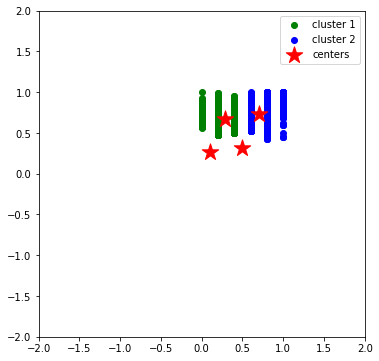

In [323]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X[km_model.labels_ == 0, 0], X[km_model.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X[km_model.labels_ == 1, 0], X[km_model.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300,
            c='r', label='centers')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('')
plt.ylabel('')
plt.title('', fontweight='bold')
ax.set_aspect('equal');

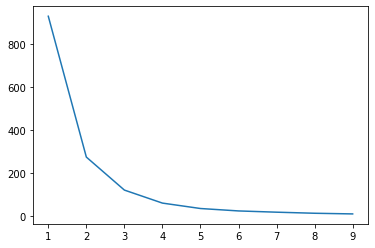

In [228]:
#Finding the Optimal Number of Clusters
costs = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(dataset)
    costs.append(model.inertia_)
plt.plot(np.arange(1,10), costs)

In [ ]:
#optimal value of k is between 2 and 4, implement k-means again using k=3

In [324]:
km_model = KMeans(n_clusters=3,random_state=42)
km_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

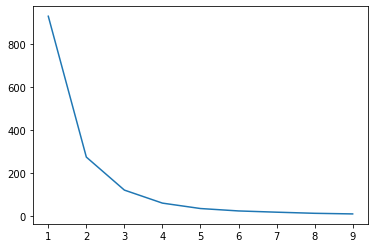

In [325]:
costs = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(dataset)
    costs.append(model.inertia_)
plt.plot(np.arange(1,10), costs)

In [326]:
centers = km_model.cluster_centers_

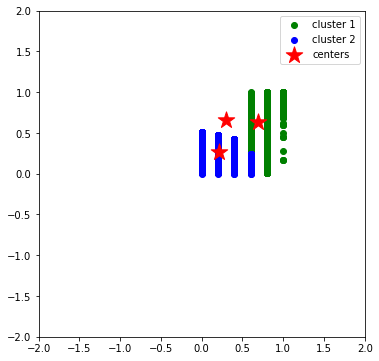

In [327]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X[km_model.labels_ == 0, 0], X[km_model.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X[km_model.labels_ == 1, 0], X[km_model.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centers[:, 0], centers[:, 1], marker='*', s=300,
            c='r', label='centers')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('')
plt.ylabel('')
plt.title('', fontweight='bold')
ax.set_aspect('equal');